# Project 1: Kings County Housing Data


* Student name: Serafina Gomes
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


In this project we're going to examine a dataset of house sales from Kings county in Washington. The dataset is included in repo in a .csv. The plan is to load the dataset, see what features are included, deal with missing data, possibly add features, deal with categorical features, check for multicollinearity, create a model, and finally see if the model is any good.  

# Initial Data Exploration

In [1]:
#load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#embeds visualizations in notebook
%matplotlib inline

#Supress warnings
warnings.filterwarnings("ignore")
#seaborn style
sns.set_style('whitegrid')

In [2]:
kings_data = pd.read_csv('kc_house_data.csv') #Create dataframe from csv 
kings_data.head() #check first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Get number of entries and data types for each column 
kings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


There are 21597 entries in 21 columns with float, int, and object data types.

In [4]:
#Get basic stats (i.e. mean, median, count, standard deviation, etc.) for dataframe
kings_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the data we can see that sqft_basement is listed as an object data type instead of an integer or float like it's column title suggests. Let's explore this a bit and convert if necessary. 33 bedrooms for max bedrooms also seems really high and might need to be dealt with by removing it from the set. 

In [5]:
#checking for non-standard values
kings_data.sqft_basement.value_counts() 

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
508.0         1
1852.0        1
2360.0        1
2120.0        1
862.0         1
946.0         1
1281.0        1
1920.0        1
516.0         1
784.0         1
1798.0        1
1990.0        1
374.0         1
792.0         1
861.0         1
1135.0        1
4130.0        1
704.0         1
2240.0        1
283.0         1
1930.0        1
1913.0        1
2300.0        1
1481.0        1
2350.0        1
143.0         1
2180.0        1
2810.0        1
207.0         1
415.0         1
Name: sqft_basement, Len

It appears that the values are in fact supposed to be integers or float. Also, it appears there's a decent amount of entries are marked as ?, however since it's only about 2% out of 21597 entries it should be safe to zero it out. Then we'll convert to the proper datatype.

In [6]:
kings_data['sqft_basement'] = kings_data['sqft_basement'].replace(['?'], '0.0')
kings_data.sqft_basement = kings_data.sqft_basement.astype(np.float64)
kings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Now let's look for null values

In [7]:
kings_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
kings_data.waterfront.unique()

array([nan,  0.,  1.])

In [9]:
kings_data.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [10]:
kings_data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

So waterfront has NaN, but also 0 and 1, so it's either true or false. Values for view are NaN and 0 to 4. The description of the column in the original repo seems to indicate it describes if the home has been viewed, in which case it'd either be 0 and 1. It seems like instead it's number of views or possibly number of views within the cardinal directions. In year rennovated 0 seems to stand for not rennovated. Given the column descriptions and values of other entries it should be safe to convert all NaN entries to 0.

In [11]:
kings_data.fillna(0, inplace=True)
kings_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Adding Features

Next let's add a column for price/sqft and drop id since it doesn't seem like it will be useful for our analysis. Price per sqft makes sense to add as a column since that's a typical metric in real estate. People typically want to know how much house they're getting for their money and it's a trivial feature to add. 

In [12]:
kings_data['price_per_sqft'] = kings_data['price'] / kings_data['sqft_living']
kings_data.drop(['id'], axis=1, inplace=True)

It's not uncommon for home value/sale price to be dictating by proximity to someplace desirable. Amazon HQ is located in Seattle and is a pretty desirable place to work, so let's create a feature with distance from Amazon HQ and see if that affects price per sqft. Since we have latitude and longitude this should be pretty easy to implement. 

In [13]:
#!pip install geopy
#may need to install dependencies 

In [14]:
#import required packages to get distance. 
from geopy import distance
from geopy.geocoders import Nominatim

In [15]:
geolocator = Nominatim(user_agent="python project") # need to give geolocation a user_agent other than default
location = geolocator.geocode("410 Terry Ave. North, Seattle, WA") #Amazon address
Amazon = location.latitude, location.longitude #make a tupple of lat and long

kings_data['lat'] = kings_data['lat'].astype(str)
kings_data['long'] = kings_data['long'].astype(str)
kings_data['distance_from_Amazon'] = "" #create empty column 

In [16]:
#use distance from geopy to get geodesic distance between the two locations
#and add to column 
for i, j in kings_data.iterrows():
    second_location = (j.lat, j.long)
    x = distance.distance(Amazon, second_location).miles
    kings_data.loc[[0, i], 'distance_from_Amazon'] = x
#convert values to float since it defaults to string    
kings_data['distance_from_Amazon'] = kings_data['distance_from_Amazon'].astype(np.float64)

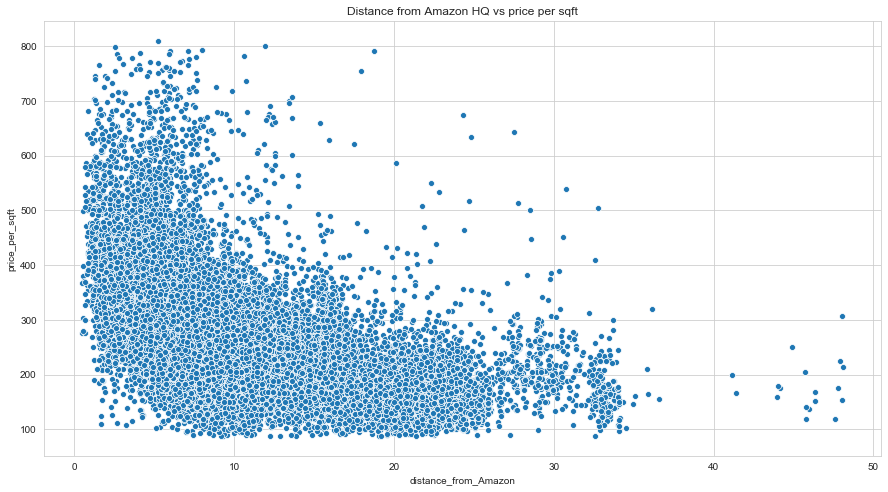

In [17]:
#Create plot showing distance from Amazon HQ vs price/sqft
fig = plt.subplots(figsize=(15,8))
plt.title('Distance from Amazon HQ vs price per sqft')
sns.scatterplot(x=kings_data['distance_from_Amazon'], y=kings_data['price_per_sqft']);


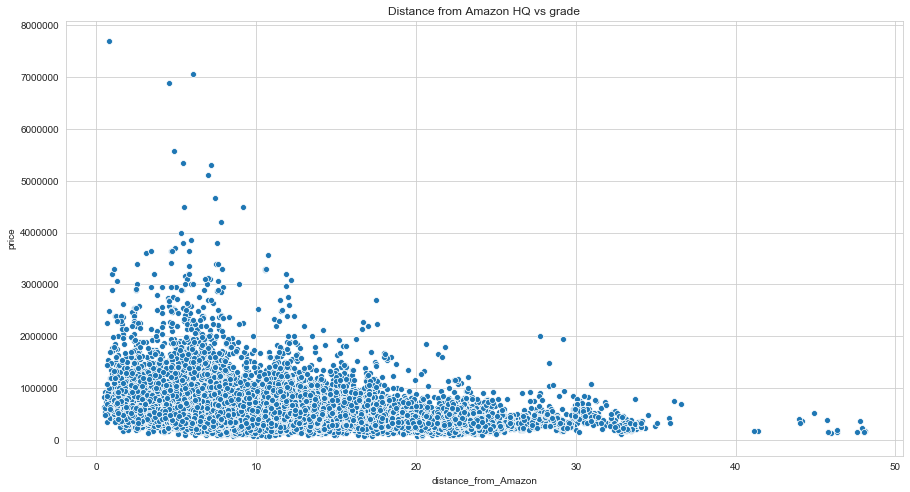

In [18]:
#Create plot showing distance from Amazon HQ vs price
fig= plt.subplots(figsize=(15,8))
plt.title('Distance from Amazon HQ vs grade')
sns.scatterplot(x=kings_data['distance_from_Amazon'], y=kings_data['price']);

As we can see, there is a fairly large distribution of higher price per sqft properties less than 10 miles from the Amazon HQ. There most likely other factors involed as well. All the highest priced homes are within 10 miles of Amazon HQ as well. 

# Dealing with categories and multi-colinearity 

Now let's look for data to deal with that is highly correlative or categorical. 

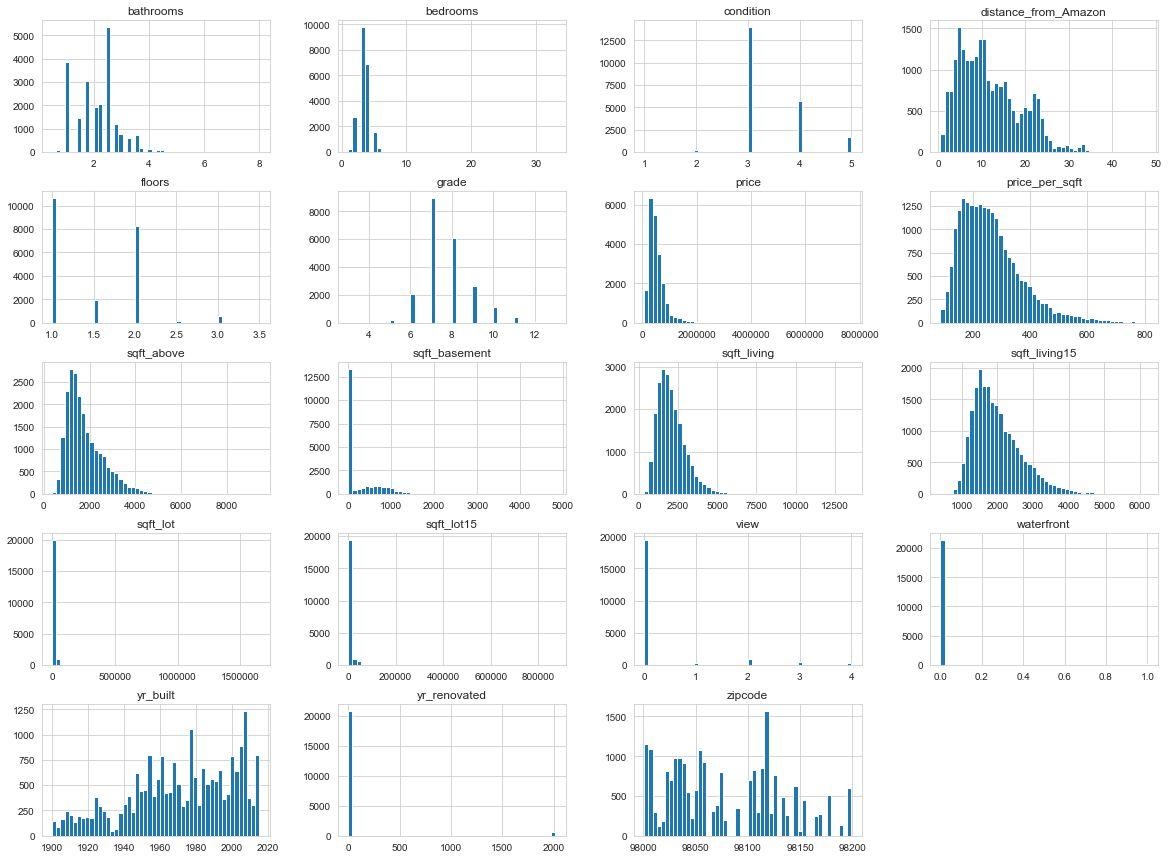

In [19]:
#Display histograms of each column 
kings_data.hist(figsize=(20,15), bins=50);

The distribution looks fairly normal for most of the continuous variables. There's some positive skew in a few of them. We'll try creating a model without scaling and depending on time another with scaled continuous variables. Let's look at correlation next. 

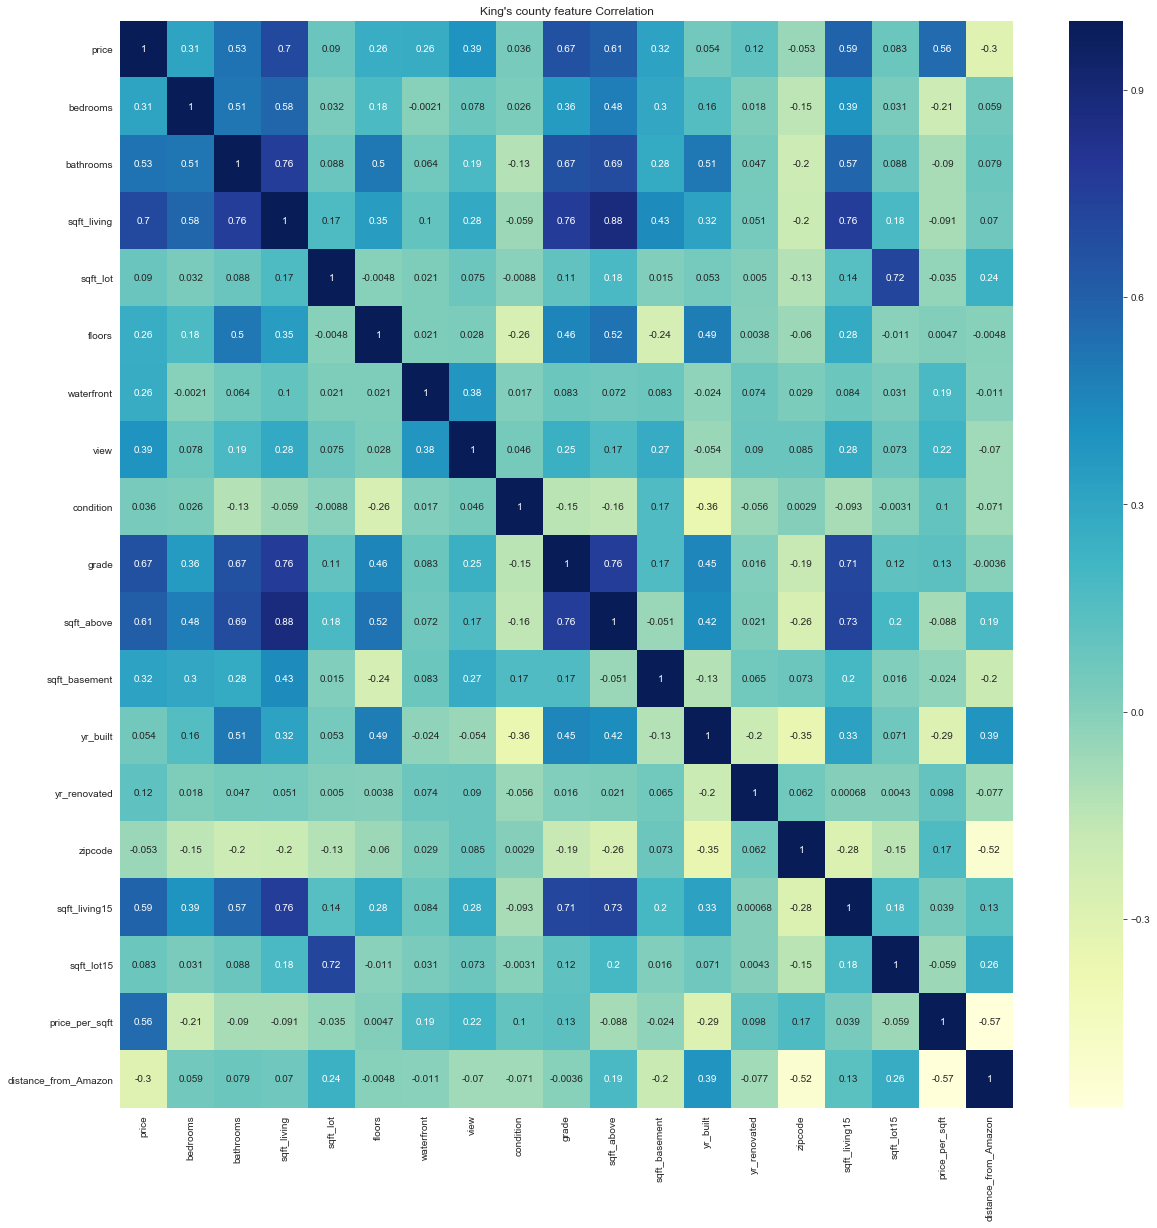

In [20]:
#create heatmap to show correlation
fig = plt.subplots(figsize = (20,20))
plt.title("King's county feature Correlation")
sns.heatmap(kings_data.corr(), annot=True, cmap='YlGnBu');


The correlation factor on sqft_above is really high at 0.88 for sqft_living, so let's drop it. Sqft_living15 is also really high with sqft_living. Let's drop that as well. 

In [21]:
kings_data.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)

it looks like there's quite a few cateorgorical columns we can deal with. So let's deal with those before we any modeling and analysis.

In [22]:
#convert date to datetime type
kings_data.date = pd.to_datetime(kings_data['date'])
kings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date                    21597 non-null datetime64[ns]
price                   21597 non-null float64
bedrooms                21597 non-null int64
bathrooms               21597 non-null float64
sqft_living             21597 non-null int64
sqft_lot                21597 non-null int64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null int64
grade                   21597 non-null int64
sqft_basement           21597 non-null float64
yr_built                21597 non-null int64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null int64
lat                     21597 non-null object
long                    21597 non-null object
sqft_lot15              21597 non-null int64
price_per_sqft          21597 non-null float64
distance_

In [23]:
#make list of categories
categories = ['bedrooms', 'bathrooms', 'view', 'waterfront', 'floors', 'condition', 'grade', 'zipcode']
#loop through list and convert to category types
for i in categories:
    kings_data[i] = kings_data[i].astype('category')
#create dummy variables
bedrooms = pd.get_dummies(kings_data['bedrooms'], prefix='br', drop_first=True)
bathrooms = pd.get_dummies(kings_data['bathrooms'], prefix='bath', drop_first=True)
view = pd.get_dummies(kings_data['view'], prefix='v', drop_first=True)
waterfront = pd.get_dummies(kings_data['waterfront'], prefix='w', drop_first=True)
floors = pd.get_dummies(kings_data['floors'], prefix='fl', drop_first=True)
condition = pd.get_dummies(kings_data['condition'], prefix='c', drop_first=True)
grade = pd.get_dummies(kings_data['grade'], prefix='g', drop_first=True)
zipcode = pd.get_dummies(kings_data['zipcode'], prefix = 'z', drop_first=True)
date = pd.get_dummies(kings_data['date'], prefix='d', drop_first=True)
year = pd.get_dummies(kings_data['yr_built'], prefix='year', drop_first=True)

In [24]:
#Create separate dataframe with everything
kings_data_cat = pd.concat([kings_data, bedrooms, bathrooms, 
    view, waterfront, floors, condition, grade, date, zipcode, year], axis=1)
#Drop columns category column
kings_data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 
    'grade', 'waterfront', 'view', 'date', 'sqft_lot15', 'lat', 'long', 
    'zipcode', 'yr_built'], axis=1, inplace=True)

# Making a Model 

In [25]:
#Import necessary libraries from model creation
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
outcome = 'price'
predictors = kings_data.drop(['price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [27]:
model = ols(formula= formula, data=kings_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 2.674e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:14:06   Log-Likelihood:            -2.8437e+05
No. Observations:               21597   AIC:                         5.688e+05
Df Residuals:                   21590   BIC:                         5.688e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.609e+05   4552.490   -145.183      0.000    -6.7e+05   -6.52e+05
sqft_living            302.0867      1.067    283.163      0.000     299.996     304.178
sqft_lot                -0.2129      0.022     -9.718      0.000      -0.256      -0.170
sqft_basement           12.9443      2.271      5.701      0.000       8.494      17.395
yr_renovated            17.7019      2.384      7.426      0.000      13.029      22.374
price_per_sqft        2116.8415      9.819    215.595      0.000    2097.596    2136.087
distance_from_Amazon  1020.8191    162.662      6.276      0.000     701.991    1339.648
==============================================================================
Omnibus:                    21221.701   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6816384.960
Skew:                           4.154   Prob(JB):                         0.00
Kurtosis:                      89.636   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# How good is our model?

In [28]:
#import required library to create a test train split
from sklearn.model_selection import train_test_split

#Train test splitting
y = kings_data[['price']]      
X = kings_data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [62]:
#import required libraries to check for MSE
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)


print('Average predicted price: ${:.02f}'.format(y_hat_test.mean()))
print('Average actual price: ${:.02f}'.format(y_test['price'].mean()))


Train Mean Squared Error: price    1.560026e+10
dtype: float64
Test Mean Squared Error: price    1.767654e+10
dtype: float64
Average predicted price: $542532.02
Average actual price: $547388.82


In [ ]:
cross_val = [cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error")]
cross_val

# Analysis

The R-squared value is pretty high at 0.88. There is a pretty good change our model is an overfit. This can be bad as it shows our regression line is constantly over or under predicting and introducing a lot of error. In the case of our model we have a lot of error. There is also a fairly big difference between train mean and test mean. This shows our model isn't particularly good as a predictor for helping sellers predicit what their home will sell for. It looks like price per sqft, distance from Amazon, sqft living had the biggest impact on the model. They also have very low p-values so that indicates strong evidence against the null hypothesis. 

In a future model, it might be helpful to do data scaling on the majority of the continuous variables. I presumed they looked normal enough, but that doesn't appear to be the case. It might also prove helpful to to remove outliers from certain features like price, bedrooms, bathrooms, etc. Given more time I'd comb through each categorigical feature and remove the ones with high p-values. There's also probably features that would have proved more important for my model that I did not add like bathrooms and grade. 